In [2]:
from my_snn.rsnn import RSNN, RSNN_2l, RSNN_2l_ALIF
from my_snn.rsnn_delays import RSNN_d_d, RSNN_d_i, RSNN_d_all
from my_snn.tonic_dataloader import DatasetLoader
from my_snn.custom_dataloader import AddTaskDatasetLoader, AddTask2DatasetLoader, MultTaskDatasetLoader
from my_snn.utils import train, training_plots, ModelLoader
import torch
from torch.utils.data import DataLoader
import matplotlib.pyplot as  plt
import numpy as np

device = "cuda:0"
ckpt_dir = 'addsum_tests'

## Adding Task (50 frames)

In [3]:
time_window = 50
batch_size = 128 # 128: anil kag

snn_d50_fs = ModelLoader('add2_50_d_128_fs', ckpt_dir, batch_size, device)
snn_rnn50_fs = ModelLoader('add2_50_rnn_128_fs', ckpt_dir, batch_size, device)

delays: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
instance of <class 'my_snn.rsnn_delays.RSNN_d_d'> loaded sucessfully
delays: [0]
instance of <class 'my_snn.rsnn_delays.RSNN_d_i'> loaded sucessfully


#### Weights seen by output neurons

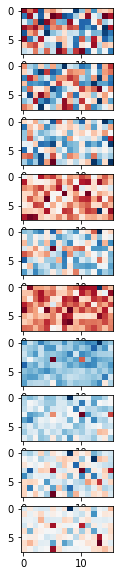

In [6]:
plt.figure(figsize=(10,10))
snn_d50_fs.plot_per_neuron_delays(snn_d50_fs.f1_o, n_cols=1)

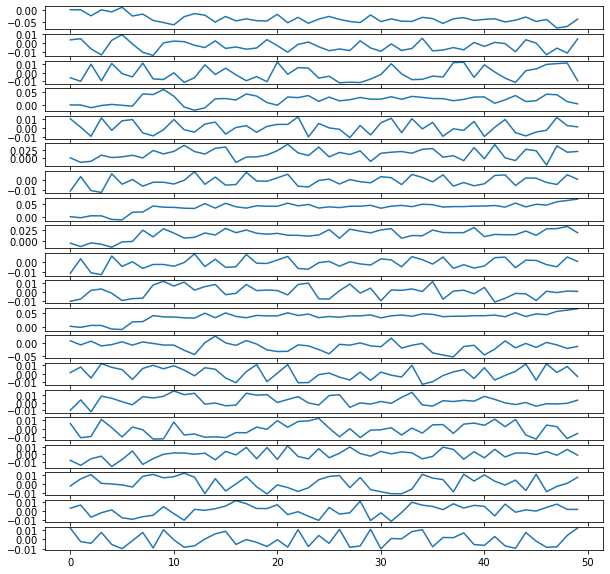

In [9]:
plt.figure(figsize=(10,10))
snn_d50_fs.plot_per_neuron_delays(snn_d50_fs.f1_o, n_cols=20, mode='synapse')

<Figure size 720x720 with 0 Axes>

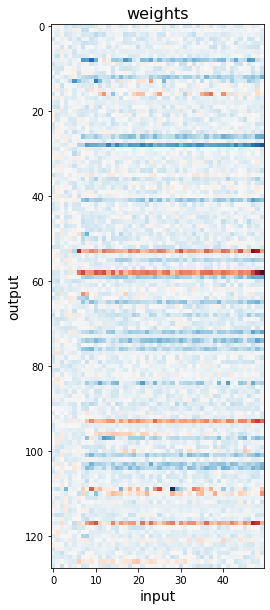

In [13]:
plt.figure(figsize=(10,10))
f = snn_d50_fs.plot(snn_d50_fs.f1_o.weight.reshape(128,50), mode='matrix')

## Adding Task (500 frames)

In [2]:
time_window = 500
batch_size = 128 # 128: anil kag
d_train = AddTask2DatasetLoader(time_window, batch_size, randomness=True)
d_test = AddTask2DatasetLoader(time_window, batch_size, randomness=True) # 2560 from schmiduber paper
train_loader = DataLoader(d_train, batch_size=batch_size, num_workers=0)
test_loader = DataLoader(d_test, batch_size=batch_size, num_workers=0)

snn_d500_fs = ModelLoader('add2_500_d_128_fs', ckpt_dir, batch_size, device)
snn_rnn500_fs = ModelLoader('add2_500_rnn_128_fs', ckpt_dir, batch_size, device)

delays: [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490]
instance of <class 'my_snn.rsnn_delays.RSNN_d_d'> loaded sucessfully
delays: [0]
instance of <class 'my_snn.rsnn_delays.RSNN_d_d'> loaded sucessfully


(0.0, 0.3)

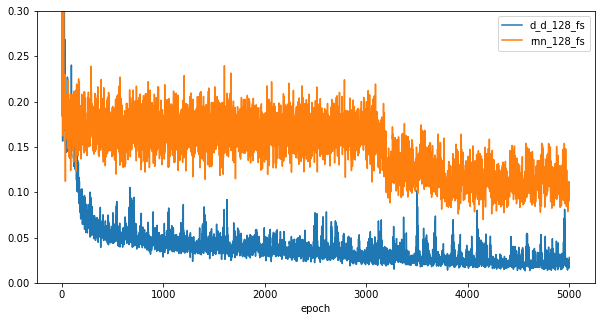

In [3]:
plt.figure(figsize=(10,5))
ax = snn_d500_fs.plot_per_epoch(snn_d500_fs.train_loss, label='d_d_128_fs')
snn_d500_fs.plot_per_epoch(snn_rnn500_fs.train_loss, label='rnn_128_fs')
ax.set_ylim(0,0.3)

In [3]:
import matplotlib.pyplot as  plt
import numpy as np


d_test = AddTask2DatasetLoader(500, 128, randomness=True) # 2560 from schmiduber paper
test_loader = DataLoader(d_test, batch_size=batch_size, num_workers=0)

snn_d500_fs.loss_fn = 'prediction2'
snn_rnn500_fs.loss_fn = 'prediction2'
for images, labels in test_loader:
    pred_r, ref_r = snn_rnn500_fs.propagate(images.to(device), labels.to(device))
    pred_d, ref_d = snn_d500_fs.propagate(images.to(device), labels.to(device))

## Multiplication task (50 frames)

In [6]:
time_window = 50
batch_size = 128 # 128: anil kag
#d_train = AddTaskDatasetLoader(time_window, batch_size)
d_train = MultTaskDatasetLoader(time_window, batch_size, randomness=True)
d_test = MultTaskDatasetLoader(time_window, batch_size, randomness=True) # 2560 from schmiduber paper
train_loader = DataLoader(d_train, batch_size=batch_size, num_workers=0)
test_loader = DataLoader(d_test, batch_size=batch_size, num_workers=0)

snn_d50_fs = ModelLoader('mult_50_d_128_fs', ckpt_dir, batch_size, device)
snn_rnn50_fs = ModelLoader('mult_50_rnn_128_fs', ckpt_dir, batch_size, device)

delays: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
instance of <class 'my_snn.rsnn_delays.RSNN_d_d'> loaded sucessfully
delays: [0]
instance of <class 'my_snn.rsnn_delays.RSNN_d_i'> loaded sucessfully


(0.0, 0.1)

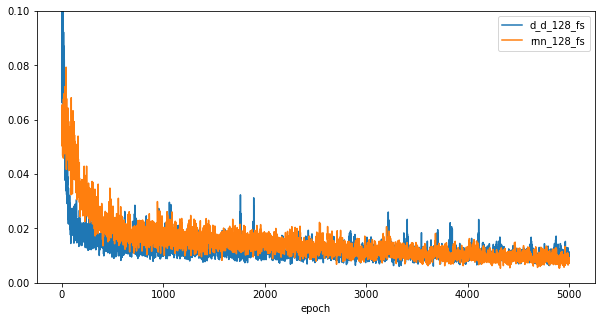

In [8]:
plt.figure(figsize=(10,5))
ax = snn_d50_fs.plot_per_epoch(snn_d50_fs.train_loss, label='d_d_128_fs')
snn_d50_fs.plot_per_epoch(snn_rnn50_fs.train_loss, label='rnn_128_fs')
ax.set_ylim(0,0.1)

Test set accuracy (rnn): 78.125%
Test set accuracy (delays): 74.21875%


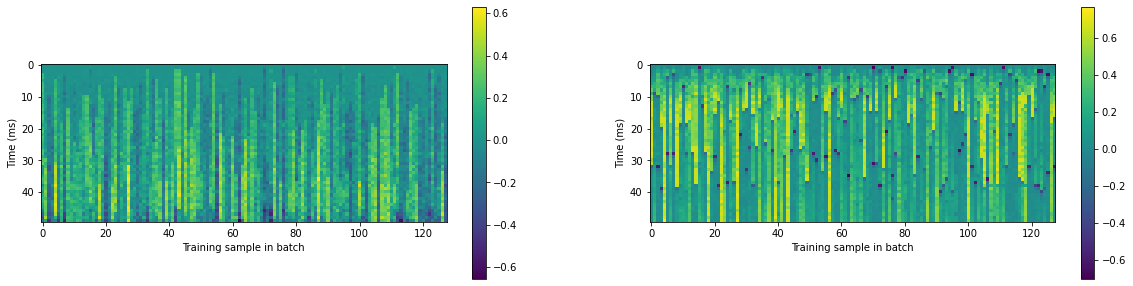

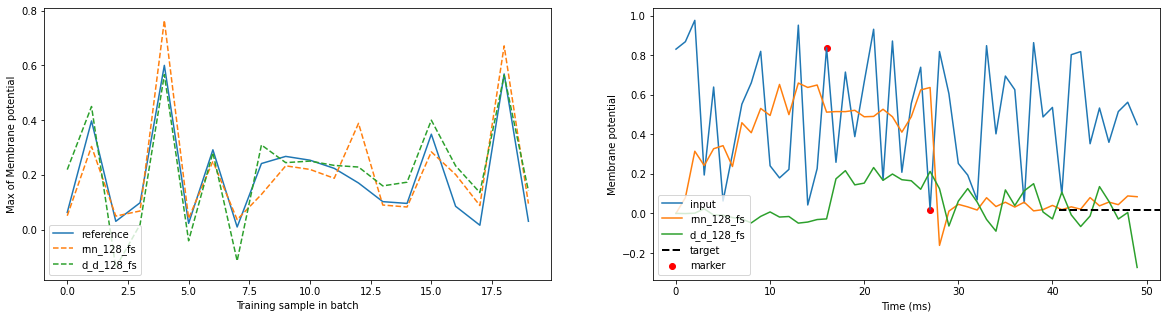

In [13]:
n = np.random.randint(batch_size)
d_test = MultTaskDatasetLoader(50, 128, randomness=True) # 2560 from schmiduber paper
test_loader = DataLoader(d_test, batch_size=batch_size, num_workers=0)

snn_d50_fs.loss_fn = 'prediction2'
snn_rnn50_fs.loss_fn = 'prediction2'
for images, labels in test_loader:
    pred_r, ref_r = snn_rnn50_fs.propagate(images.to(device), labels.to(device))
    pred_d, ref_d = snn_d50_fs.propagate(images.to(device), labels.to(device))

correct_r = torch.sum(abs(pred_r-ref_r) < 0.1)
correct_d = torch.sum(abs(pred_d-ref_d) < 0.1)
print(f'Test set accuracy (rnn): {100*correct_r.item()/len(images)}%')
print(f'Test set accuracy (delays): {100*correct_d.item()/len(images)}%')

cmap = 'RdBu'

fig, (ax1, ax2) = plt.subplots(figsize=(20, 5), ncols=2)
im1 = ax1.imshow(snn_d50_fs.mem_state['output'][:,:,0].detach().cpu().numpy())
fig.colorbar(im1, ax = ax1)
ax1.set_ylabel('Time (ms)')
ax1.set_xlabel('Training sample in batch')
im2 = ax2.imshow(snn_rnn50_fs.mem_state['output'][:,:,0].detach().cpu().numpy())
fig.colorbar(im2, ax = ax2)
ax2.set_ylabel('Time (ms)')
ax2.set_xlabel('Training sample in batch')

plt.figure(figsize=(20,5))
plt.subplot(121)
plt.plot(ref_r[:20].detach().cpu().numpy(), label='reference')
plt.plot(pred_r[:20].detach().cpu().numpy(), label = 'rnn_128_fs', ls='--')
plt.plot(pred_d[:20].detach().cpu().numpy(), label= 'd_d_128_fs', ls='--')
plt.xlabel('Training sample in batch')
plt.ylabel('Max of Membrane potential')
plt.legend(loc='lower left')

inp = snn_d50_fs.spike_state['input'].detach().cpu().numpy()[:, n ,0]
spk = snn_d50_fs.spike_state['input'].detach().cpu().numpy()[:, n ,1]

plt.subplot(122)
plt.plot(inp, label='input')
plt.plot(snn_rnn50_fs.mem_state['output'].detach().cpu().numpy()[:, n ,:], label = 'rnn_128_fs')
plt.plot(snn_d50_fs.mem_state['output'].detach().cpu().numpy()[:, n ,:], label= 'd_d_128_fs')
plt.scatter(spk.nonzero(), inp[spk.nonzero()], color='r', label='marker')
plt.axhline(ref_d[n].item(), 0.8, 1.0, color='k', lw=2, ls='--', label='target')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane potential')
plt.legend(loc='lower left')
plt.show()